In [1]:
import sys
sys.path.insert(0, r'../../../quetzal')

from quetzal.model import stepmodel, model

import geopandas as gpd
%matplotlib inline

C:\Users\qchasserieau\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


SQLalchemy is not installed. No support for SQL output.


In [2]:
training_folder = '../../'
input_folder = training_folder + r'inputs/'

# add road

In [3]:
sm = stepmodel.StepModel(epsg=4326, coordinates_unit='degree')
road_links = gpd.read_file(input_folder+'road/road_links.geojson', driver='GeoJSON')
road_nodes = gpd.read_file(input_folder+'road/road_nodes.geojson', driver='GeoJSON')
road_nodes.set_index('index', inplace=True)
sm.road_links = road_links
sm.road_nodes = road_nodes

# road integrity

In [4]:
sm.integrity_fix_collision()

can not add prefixes on table:  links
can not add prefixes on table:  footpaths


In [5]:
sm.road_links.head()

,index,a,b,length,geometry
0,1,osm_node_248926634,osm_node_308742619,112.426,"LINESTRING (-69.89109 18.47105, -69.89006 18.4..."
1,2,osm_node_248926634,osm_node_308744060,65.751,"LINESTRING (-69.89109 18.47105, -69.89133 18.4..."
2,3,osm_node_248958985,osm_node_308695340,109.870,"LINESTRING (-69.89053 18.46951, -69.88956 18.4..."
3,4,osm_node_248958985,osm_node_308796877,89.835,"LINESTRING (-69.89053 18.46951, -69.89080 18.4..."
4,5,osm_node_248959002,osm_node_308695337,143.242,"LINESTRING (-69.88856 18.47167, -69.88823 18.4..."


## road_fix

In [6]:
road_links.head()

,index,a,b,length,geometry
0,1,osm_node_248926634,osm_node_308742619,112.426,"LINESTRING (-69.89109 18.47105, -69.89006 18.4..."
1,2,osm_node_248926634,osm_node_308744060,65.751,"LINESTRING (-69.89109 18.47105, -69.89133 18.4..."
2,3,osm_node_248958985,osm_node_308695340,109.870,"LINESTRING (-69.89053 18.46951, -69.88956 18.4..."
3,4,osm_node_248958985,osm_node_308796877,89.835,"LINESTRING (-69.89053 18.46951, -69.89080 18.4..."
4,5,osm_node_248959002,osm_node_308695337,143.242,"LINESTRING (-69.88856 18.47167, -69.88823 18.4..."


In [7]:
sm.integrity_fix_road_network(cutoff=10, recursive_depth=5)

direct: 50632it [00:13, 3714.27it/s]
reversed: 50632it [00:14, 3550.41it/s]
50588it [00:13, 3797.28it/s]
direct: 50588it [00:14, 3465.99it/s]
reversed: 50588it [00:12, 3911.61it/s]
50586it [00:13, 3723.05it/s]


## road_test

In [8]:
sm.integrity_test_dead_ends()

50586it [00:03, 15752.28it/s]


In [9]:
sm.integrity_fix_road_nodeset_consistency()

In [10]:
sm.integrity_test_isolated_roads()

# plot

<AxesSubplot:>

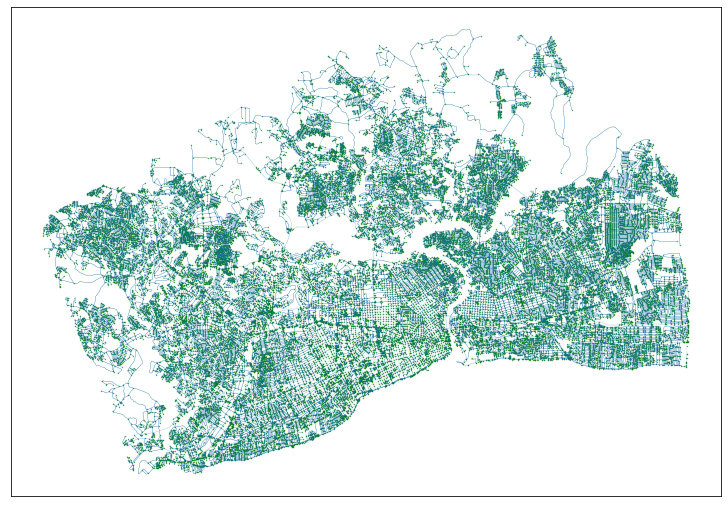

In [11]:
sm.plot(
    'road_nodes', color='green', markersize=0.1,
    ax=sm.plot('road_links', figsize=[16, 9], linewidth=0.1)
)

# projection

In [12]:
projected = sm.change_epsg(32619, 'meter')

Reprojecting model from epsg 4326 to epsg 32619: 100%|█████████████████████████████████| 34/34 [00:13<00:00,  2.54it/s]


# to_file

In [13]:
projected.to_zip(training_folder + 'model/preparation/road.zip')   

jsons: 100%|███████████████████████████████████████████████████████████████████████████| 27/27 [00:06<00:00,  4.25it/s]
